In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Joined

In [4]:
joined = pd.read_csv('joined.csv')

/tmp/ipykernel_122694/1891019688.py:1: DtypeWarning: Columns (64,99,100,125,126,136,137,142,143,145,149,151,165,170,171,177,180,181,183,184,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,203,204,205,206,207,208,209,211,216,217,218,219,224,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,297,300,301,302,308,311,312,317,318,322,324,325,328,330,331,332,333,334,335,336,337,339,340,341,342,343,344,345,346,347,348,350,351,352,353,354,355,356,357,358,359,360,362,363) have mixed types. Specify dtype option on import or set low_memory=False.
  joined = pd.read_csv('joined.csv')


Text(0.5, 1.0, 'densidad de NAs por columna')

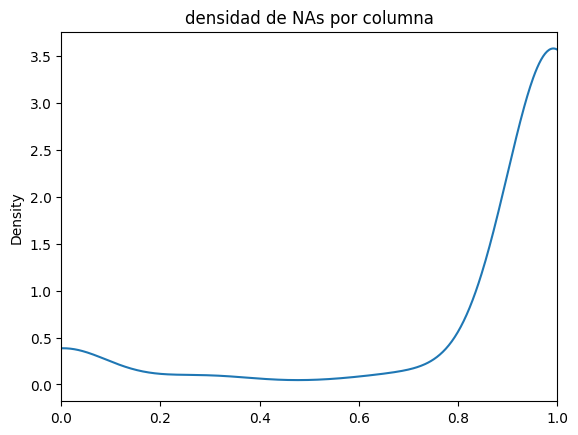

In [5]:
joined.isna().mean().plot.density()
plt.xlim(0, 1)
plt.title('densidad de NAs por columna')

In [6]:
joined.apply(lambda col: col.str.contains('control'), axis=1).mean(skipna=False).sort_values(ascending=False)

attributes           0.02298
jattr               0.018384
sample_name         0.002911
biosample                0.0
librarysource            0.0
                      ...   
InitialTimePoint         NaN
Authors                  NaN
HostIndividual           NaN
barcodesequence          NaN
scientific_name          NaN
Length: 364, dtype: object

In [7]:
joined.sample_title_sam.unique()

array([nan, 'control_20160916_rep1', 'thinning_20160916_rep2',
       'thinning_20160930_rep2', 'control_20160930_rep1',
       'control_20160930_rep2', 'Internodes of soybean, sampling 3',
       'thinning_20160916_rep1', 'control_20160916_rep2',
       'Internodes of soybean, sampling 1', 'thinning_20160930_rep1',
       'Internodes of soybean, sampling 2', 'Glycine max RNA-Seq',
       'Roots of soybean, sampling 1', 'Roots of soybean, sampling 3',
       'Roots of soybean, sampling 2'], dtype=object)

In [8]:
joined.apply(lambda col: col.str.contains('drought'), axis=1).mean(skipna=False).sort_values(ascending=False)

attributes           0.00743
sample_name         0.004366
jattr               0.003217
biosample                0.0
librarysource            0.0
                      ...   
InitialTimePoint         NaN
Authors                  NaN
HostIndividual           NaN
barcodesequence          NaN
scientific_name          NaN
Length: 364, dtype: object

In [9]:
joined['isolation_source_sam'].unique()

array([nan, "['missing']", "['not collected']", "['not provided']",
       "['Mixture of SMV strains SC1 and SC3']",
       "['Palnt pathology, PDKV Akola']", "['Well-watered']", "['LNLP']",
       "['plant']", "['drought']", "['HN']", "['field cultivation']",
       "['not applicable']", "['LN']", "['leaf']"], dtype=object)

Quiero hacer esto para toda columna, con palabras clave

In [10]:
def cols_match(row, pat):
    row
    return row[row.astype(str).str.contains(pat, regex=False, case=False).fillna(False)].index.to_list()

In [11]:
kws = ['control', 'stress', 'drought', 'bacteria', 'inoculated', 'flood', 'deficit', 'infest', 'pathogen', 'acid', 'fungal']


In [12]:
stresses = pd.DataFrame(joined['biosample'])
for kw in kws:
    stresses[kw] = joined.apply(lambda row: cols_match(row, kw), axis=1)
stresses.to_csv('stresses.csv')

In [13]:
stresses_len = stresses.map(len)
stresses_len

,biosample,control,stress,drought,bacteria,inoculated,flood,deficit,infest
0,12,0,0,0,0,0,0,0,0
1,12,0,0,0,0,0,0,0,0
2,12,0,0,0,0,4,0,0,0
3,12,0,0,0,0,0,0,0,0
4,12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
13050,12,0,3,0,0,0,0,0,0
13051,12,0,0,0,0,3,0,0,0
13052,12,0,0,0,0,0,0,0,0
13053,12,0,0,0,0,0,0,0,0


In [14]:
stresses_len.where(stresses_len == 0).isna().sum()

biosample     13055
control         709
stress         1215
drought         221
bacteria          0
inoculated      562
flood             0
deficit         252
infest          266
dtype: int64

In [15]:
indicators = {}
kw = 'stress'
for i in stresses[stresses_len[kw] != 0].index:
    stresses.loc[i, kw] != []
    indicators[joined.loc[i, 'biosample']] = joined.loc[i, stresses.loc[i, kw]].to_dict()

In [16]:
json.dumps(indicators)

'{"SAMN21359827": {"attributes": "[{k=assemblyname, v=GCA_000004515.4}, {k=bases, v=2336367812}, {k=bytes, v=353182045}, {k=run_file_create_date, v=2021-09-14T19:45:00.000Z}, {k=accession_sam, v=PI 090392}, {k=age_sam, v=60 minutes after iron stress}, {k=biological_replicate_sam, v=Rep 1 of 3}, {k=collected_by_sam, v=M.A.G., J.A.O., C.E.M.}, {k=collection_location_sam, v=Ames, IA}, {k=cultivar_sam, v=7352}, {k=growth_protocol_sam_s_dpl216, v=Hydroponics in growth chamber}, {k=tissue_sam_ss_dpl145, v=Root}, {k=treatment_sam_ss_dpl55, v=Sufficient iron}, {k=primary_search, v=21359827}, {k=primary_search, v=706999}, {k=primary_search, v=G10_PI90392_Root_Suf_Rep1}, {k=primary_search, v=GORS10-1}, {k=primary_search, v=GORS10-1_R_sort.bam}, {k=primary_search, v=PRJNA706999}, {k=primary_search, v=SAMN21359827}, {k=primary_search, v=SRP336396}, {k=primary_search, v=SRR15899241}, {k=primary_search, v=SRS10167657}, {k=primary_search, v=SRX12189809}]", "jattr": "{\\"assemblyname\\": \\"GCA_000004

In [28]:
stresses_len.iloc[joined[joined['bioproject'] == 'PRJNA197379'].index].where(stresses_len==0).isna().sum()

biosample     30
control        0
stress         1
drought        0
bacteria       0
inoculated     0
flood          0
deficit        1
infest         0
dtype: int64